1 способ Депозити фізичних осіб/ всього зобов'язань, Кредити юридичних осіб/всього активи

2 способ Депозити фізичних осіб/ всього зобов'язань ,Кредити юридичних осіб/всього кредити

3 способ Депозити фізичних осіб/ всього зобов'язань ,Кредити юридичних осіб/всього чисті активи

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import heapq
import seaborn as sns
import numpy as np
# plt.style.use('ggplot')
plt.style.use('grayscale')
# plt.rcParams['axes.prop_cycle']
%matplotlib

Using matplotlib backend: agg


In [ ]:
dataset = pd.read_excel('9_ознак_кластери(new).xlsx')
ddd = dataset.iloc[:,-1]
dataset = dataset.iloc[:,:-1]

In [ ]:
dataset.head(3)

,"Банк, номер",Назва банку,Капітал та резерви до загальної суми активів,Частка грошових коштів та їх еквівалентів у сукупних активах,Співвідношення кредитів та депозитів,Співвідношення кредитів до загальної суми активів,Співвідношення операційних витрат до загальної суми активів,Показник рентабельності активів ROA,Рентабельність капіталу ROE,Норма прибутку,Кошти клінтів/всього зобов'язань,Кредити юридичним особам/всього активи,Депозити юридичних осіб/ всього зобов'язань,Кредити фізичним особам/всього активи,Депозити фізичних осіб/ всього зобов'язань,Кредити юридичних осіб/всього кредити,Кредити юридичним особам/всього чисті активи
0,46,"АТ КБ ""ПриватБанк""",0.391869,0.047984,0.210922,0.114242,0.006118,0.015785,0.213049,0.542360,0.899320,0.031438,0.229357,0.082804,0.669020,0.275188,0.046481
1,6,"АТ ""Ощадбанк""",0.171109,0.058204,0.327531,0.236407,0.012126,0.001593,0.020903,0.087346,0.888932,0.200159,0.337830,0.036248,0.527876,0.846671,0.225355
2,2,"АТ ""Укрексімбанк""",0.181402,0.082897,0.392126,0.201836,0.011785,0.003546,0.082205,0.263999,0.648982,0.201247,0.425501,0.000589,0.142321,0.997083,0.240652


In [ ]:
dataset.corr()

,"Банк, номер",Капітал та резерви до загальної суми активів,Частка грошових коштів та їх еквівалентів у сукупних активах,Співвідношення кредитів та депозитів,Співвідношення кредитів до загальної суми активів,Співвідношення операційних витрат до загальної суми активів,Показник рентабельності активів ROA,Рентабельність капіталу ROE,Норма прибутку,Кошти клінтів/всього зобов'язань,Кредити юридичним особам/всього активи,Депозити юридичних осіб/ всього зобов'язань,Кредити фізичним особам/всього активи,Депозити фізичних осіб/ всього зобов'язань,Кредити юридичних осіб/всього кредити,Кредити юридичним особам/всього чисті активи
"Банк, номер",1.000000,-0.065749,-0.022970,-0.167183,-0.272985,0.002409,-0.115283,-0.091397,0.004750,-0.199058,-0.194240,0.157622,-0.136092,-0.348335,0.008834,-0.227343
Капітал та резерви до загальної суми активів,-0.065749,1.000000,-0.280165,0.449745,-0.323998,-0.234801,-0.494043,-0.334966,-0.555835,-0.438203,-0.264937,-0.264117,-0.112191,-0.200057,-0.311818,-0.148490
Частка грошових коштів та їх еквівалентів у сукупних активах,-0.022970,-0.280165,1.000000,-0.201687,0.035229,-0.006182,-0.008834,-0.054297,-0.011149,0.338351,0.145776,0.255093,-0.155548,0.103268,0.288176,0.078432
Співвідношення кредитів та депозитів,-0.167183,0.449745,-0.201687,1.000000,-0.117643,-0.209292,-0.051300,-0.073416,-0.016060,-0.410353,-0.086271,-0.267066,-0.054974,-0.168792,0.088221,0.162647
Співвідношення кредитів до загальної суми активів,-0.272985,-0.323998,0.035229,-0.117643,1.000000,0.434666,0.167560,0.052329,0.086631,0.456692,0.772123,-0.126821,0.411653,0.600687,0.071858,0.724417
Співвідношення операційних витрат до загальної суми активів,0.002409,-0.234801,-0.006182,-0.209292,0.434666,1.000000,-0.160383,-0.084925,-0.270783,0.104449,0.169867,-0.419123,0.416635,0.513729,-0.154700,0.106935
Показник рентабельності активів ROA,-0.115283,-0.494043,-0.008834,-0.051300,0.167560,-0.160383,1.000000,0.822175,0.869453,0.193093,-0.029586,0.127729,0.296948,0.078788,0.046463,-0.022527
Рентабельність капіталу ROE,-0.091397,-0.334966,-0.054297,-0.073416,0.052329,-0.084925,0.822175,1.000000,0.641819,0.176749,-0.209264,0.092881,0.379594,0.094982,-0.172578,-0.211853
Норма прибутку,0.004750,-0.555835,-0.011149,-0.016060,0.086631,-0.270783,0.869453,0.641819,1.000000,0.066090,0.044470,0.145061,0.067814,-0.074037,0.251934,0.075489
Кошти клінтів/всього зобов'язань,-0.199058,-0.438203,0.338351,-0.410353,0.456692,0.104449,0.193093,0.176749,0.066090,1.000000,0.293451,0.511443,0.272856,0.546776,-0.026906,0.189197


In [ ]:
dataset.iloc[:,[-3,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17]].describe().iloc[1:,:].to_excel('desc_stat.xlsx')

In [ ]:
dataset = dataset[dataset["Банк, номер"] != 593]
dataset = dataset[dataset["Банк, номер"] != 129]
dataset = dataset[dataset["Банк, номер"] != 313]

In [ ]:
dataset[dataset["Депозити фізичних осіб/ всього зобов'язань"] == 0]

,"Банк, номер",Назва банку,Капітал та резерви до загальної суми активів,Частка грошових коштів та їх еквівалентів у сукупних активах,Співвідношення кредитів та депозитів,Співвідношення кредитів до загальної суми активів,Співвідношення операційних витрат до загальної суми активів,Показник рентабельності активів ROA,Рентабельність капіталу ROE,Норма прибутку,Кошти клінтів/всього зобов'язань,Кредити юридичним особам/всього активи,Депозити юридичних осіб/ всього зобов'язань,Кредити фізичним особам/всього активи,Депозити фізичних осіб/ всього зобов'язань,Кредити юридичних осіб/всього кредити,Кредити юридичним особам/всього чисті активи
15,295,"АТ ""ІНГ Банк Україна""",0.139208,0.073679,0.764297,0.501237,0.005006,0.007088,0.02429,0.342014,0.928749,0.501237,0.928749,0.0,0.0,1.0,0.502270
18,407,"АТ ""Дойче Банк ДБУ""",0.071543,0.073224,0.089543,0.081247,0.009242,0.002766,0.03687,0.203757,0.981205,0.081247,0.981205,0.0,0.0,1.0,0.081266


In [ ]:
dataset.iloc[:,[-3,-2]]

,Депозити фізичних осіб/ всього зобов'язань,Кредити юридичних осіб/всього кредити
0,0.669020,0.275188
1,0.527876,0.846671
2,0.142321,0.997083
3,0.251991,0.916723
5,0.351377,0.880641
...,...,...
67,0.463656,0.554430
69,0.023276,0.848953
70,0.218389,0.981839
71,0.310389,0.902661


In [ ]:
X = dataset.iloc[:,[-3,-2]].values

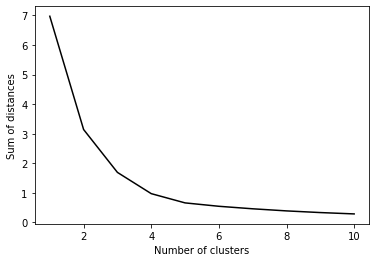

<Figure size 28800x19200 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
# plt.title('Метод ліктя')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of distances')
plt.figure(figsize=(18, 12), dpi=1600)
plt.show()

In [ ]:
def def_n_k(wcss_list):
  # функция для автоматического вычесления оптимального количества кластеров
  #wcss_list - список сумм расстояний до центриля
  list_per = []
  list_per.append(1)
  for i in range(1, len(wcss_list)):
    list_per.append(wcss[i]/wcss[i-1])
  list_per_razn = []
  for i in range(1, len(wcss_list)):
    try:
      list_per_razn.append(math.fabs(list_per[i-1] - list_per[i+1]))
    except:
      pass
  return list_per_razn.index(heapq.nlargest(2, list_per_razn)[-1])+1
def_n_k(wcss)

4

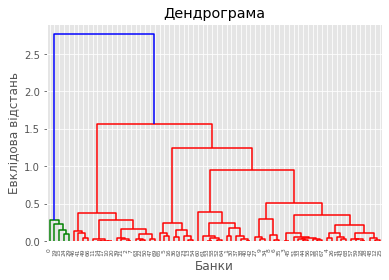

<Figure size 28800x19200 with 0 Axes>

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Дендрограма')
plt.xlabel('Банки')
plt.ylabel('Евклідова відстань')
plt.figure(figsize=(18, 12), dpi=1600)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
dataset

In [ ]:
dataset[y_kmeans == 0]["Кредити юридичних осіб/всього кредити"].mean(), dataset[y_kmeans == 0]["Депозити фізичних осіб/ всього зобов'язань"].mean()


(0.9393827688033712, 0.13661640526027477)

In [ ]:
dataset[y_kmeans == 1]["Кредити юридичних осіб/всього кредити"].mean(), dataset[y_kmeans == 1]["Депозити фізичних осіб/ всього зобов'язань"].mean()


(0.12276211283224939, 0.7677151038956446)

In [ ]:
dataset[y_kmeans == 2]["Кредити юридичних осіб/всього кредити"].mean(), dataset[y_kmeans == 2]["Депозити фізичних осіб/ всього зобов'язань"].mean()


(0.9420526912464985, 0.4311977735826625)

In [ ]:
dataset[y_kmeans == 3]["Кредити юридичних осіб/всього кредити"].mean(), dataset[y_kmeans == 3]["Депозити фізичних осіб/ всього зобов'язань"].mean()

(0.6088805344696033, 0.3897253447556241)

0 - роздрібна
1 - корпоративна
2 - універсальна

In [ ]:
dataset['clasters'] = y_kmeans

In [ ]:
dataset['clasters'] = dataset['clasters'].replace([1, 0, 3, 2], ['Роздрібна бізнес-модель', 'Корпоративна бізнес-модель', 'Універсальна бізнес-модель', 'Корпоративна з роздрібним фін.'])

In [ ]:
#ENG
dataset['clasters'] = dataset['clasters'].replace([1, 0, 3, 2], ['Retail business model', 'Corporate business model', 'Universal business model', 'Corporate business model with retail f.'])

In [ ]:
dataset[dataset["Депозити фізичних осіб/ всього зобов'язань"] > 0.9]

,"Банк, номер",Назва банку,Капітал та резерви до загальної суми активів,Частка грошових коштів та їх еквівалентів у сукупних активах,Співвідношення кредитів та депозитів,Співвідношення кредитів до загальної суми активів,Співвідношення операційних витрат до загальної суми активів,Показник рентабельності активів ROA,Рентабельність капіталу ROE,Норма прибутку,Кошти клінтів/всього зобов'язань,Кредити юридичним особам/всього активи,Депозити юридичних осіб/ всього зобов'язань,Кредити фізичним особам/всього активи,Депозити фізичних осіб/ всього зобов'язань,Кредити юридичних осіб/всього кредити,Кредити юридичним особам/всього чисті активи,clasters
20,325,"АТ ""БАНК ФОРВАРД""",0.448027,0.035789,0.827814,0.615015,0.031397,0.005341,0.036619,0.053309,0.939672,0.044653,0.012205,0.570362,0.927467,0.072605,0.047681,Роздрібний сектор


In [ ]:
dataset.iloc[:,[-4,-3,-1]]["Депозити фізичних осіб/ всього зобов'язань"].max()

0.9274670486022397

In [ ]:
dataset.iloc[:,[-4,-3,-1]]["Депозити фізичних осіб/ всього зобов'язань"].sort_values(ascending=False)

20    9.274670e-01
31    7.930342e-01
62    7.863629e-01
16    7.490178e-01
26    7.000369e-01
          ...     
21    5.919376e-03
11    3.595202e-03
12    3.319407e-09
15    0.000000e+00
18    0.000000e+00
Name: Депозити фізичних осіб/ всього зобов'язань, Length: 70, dtype: float64

In [ ]:
dataset.rename(columns={'clasters':'кластери'}, inplace=True)

In [ ]:
dataset.rename(columns={'кластери':'clusters'}, inplace=True)

In [ ]:
dataset

<Figure size 18000x24000 with 0 Axes>

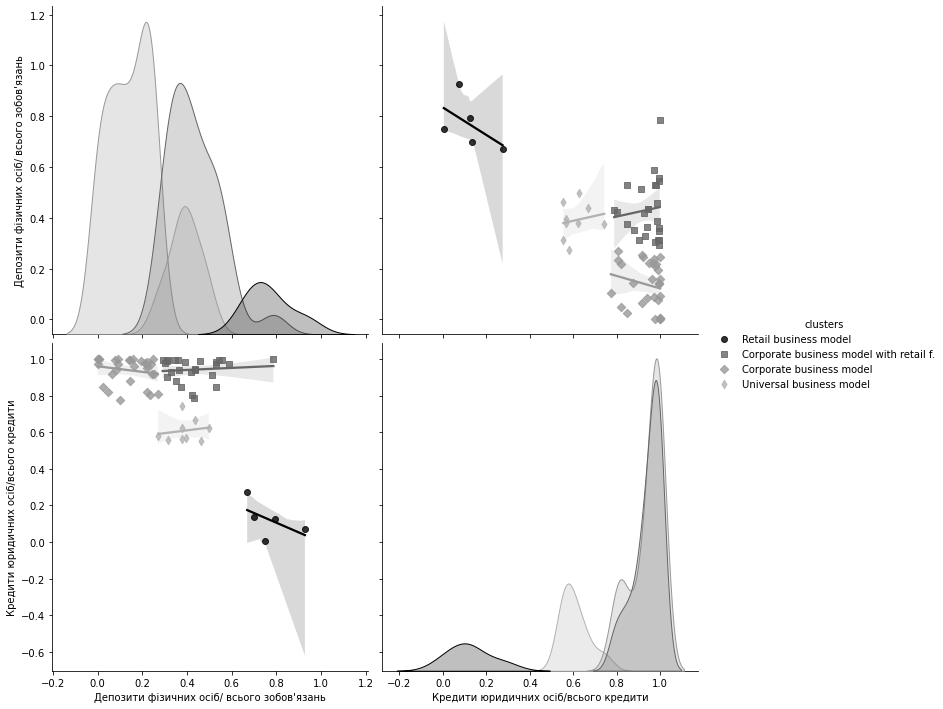

In [ ]:
# Plot
plt.figure(figsize=(120,160), dpi= 150)
sns.pairplot(dataset.iloc[:,[-4,-3,-1]], kind="reg", hue="clusters",height=5, markers=["o", "s", "D", 'd'])
plt.show()

In [ ]:
dataset[dataset['clasters']=='Роздрібний сектор']

,"Банк, номер",Назва банку,Капітал та резерви до загальної суми активів,Частка грошових коштів та їх еквівалентів у сукупних активах,Співвідношення кредитів та депозитів,Співвідношення кредитів до загальної суми активів,Співвідношення операційних витрат до загальної суми активів,Показник рентабельності активів ROA,Рентабельність капіталу ROE,Норма прибутку,Кошти клінтів/всього зобов'язань,Кредити юридичним особам/всього активи,Депозити юридичних осіб/ всього зобов'язань,Кредити фізичним особам/всього активи,Депозити фізичних осіб/ всього зобов'язань,Кредити юридичних осіб/всього кредити,Кредити юридичним особам/всього чисті активи,clasters
0,46,"АТ КБ ""ПриватБанк""",0.391869,0.047984,0.210922,0.114242,0.006118,0.015785,0.213049,0.542360,0.899320,0.031438,0.229357,0.082804,0.669020,0.275188,0.046481,Роздрібний сектор
16,142,"АТ ""Ідея Банк""",0.051095,0.014644,1.107997,0.505107,0.016893,0.026953,0.224312,0.274156,0.918628,0.002325,0.169610,0.502782,0.749018,0.004603,0.003772,Роздрібний сектор
20,325,"АТ ""БАНК ФОРВАРД""",0.448027,0.035789,0.827814,0.615015,0.031397,0.005341,0.036619,0.053309,0.939672,0.044653,0.012205,0.570362,0.927467,0.072605,0.047681,Роздрібний сектор
26,242,"АТ ""УНІВЕРСАЛ БАНК""",0.089026,0.037353,0.706946,0.511606,0.016626,0.031517,0.335170,0.396234,0.862501,0.068930,0.162464,0.442677,0.700037,0.134732,0.073873,Роздрібний сектор
31,96,"АТ ""А - БАНК""",0.075588,0.047596,0.904495,0.663226,0.022640,0.014736,0.125227,0.154118,0.959056,0.084019,0.166022,0.579207,0.793034,0.126682,0.095234,Роздрібний сектор


[1, 3, 2, 0], ['Роздрібний сектор', 'Корпоративний сектор', 'Універсальний', 'Корпоративний сектор з роздіб. ф'])

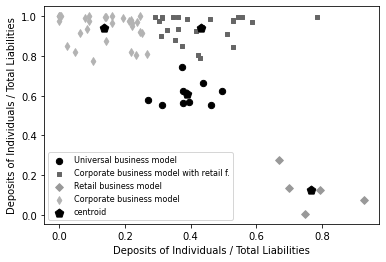

<Figure size 28800x19200 with 0 Axes>

In [ ]:
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], marker='o', s = 40, label = 'Universal business model')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], marker='s', s = 20, label = 'Corporate business model with retail f.')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], marker = 'D', s = 30, label = 'Retail business model')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], marker = 'd', s = 30, label = 'Corporate business model')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, marker = 'p', label = 'centroid')
# plt.title('Кластер фінансових показників банків')
# plt.plot(markers=["o", "s", "D", 'd'])
plt.xlabel("Deposits of Individuals / Total Liabilities")
plt.ylabel("Deposits of Individuals / Total Liabilities")
plt.legend(loc='lower left', fontsize=8)
plt.figure(figsize=(18, 12), dpi=1600)
plt.show()

Ризики по кожному кластеру

In [ ]:
print(dataset[dataset['clasters'] == 'Роздрібний сектор']['Капітал та резерви до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Роздрібний сектор']['Частка грошових коштів та їх еквівалентів у сукупних активах '].mean())
print(dataset[dataset['clasters'] == 'Роздрібний сектор']['Співвідношення кредитів та депозитів '].mean())
print(dataset[dataset['clasters'] == 'Роздрібний сектор']['Співвідношення кредитів до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Роздрібний сектор']['Співвідношення операційних витрат до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Роздрібний сектор']['Показник рентабельності активів ROA '].mean())
print(dataset[dataset['clasters'] == 'Роздрібний сектор']['Рентабельність капіталу ROE '].mean())
print(dataset[dataset['clasters'] == 'Роздрібний сектор']['Норма прибутку '].mean())
print(dataset[dataset['clasters'] == 'Роздрібний сектор']["Кошти клінтів/всього зобов'язань"].mean())

0.21112107580993592
0.03667285281148865
0.7516348128714018
0.4818390983760675
0.01873493418177828
0.01886637633886107
0.18687530588630966
0.28403551817249045
0.9158356274377049


In [ ]:
print(dataset[dataset['clasters'] == 'Корпоративний сектор']['Капітал та резерви до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор']['Частка грошових коштів та їх еквівалентів у сукупних активах '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор']['Співвідношення кредитів та депозитів '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор']['Співвідношення кредитів до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор']['Співвідношення операційних витрат до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор']['Показник рентабельності активів ROA '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор']['Рентабельність капіталу ROE '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор']['Норма прибутку '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор']["Кошти клінтів/всього зобов'язань"].mean())

0.2396210726176576
0.06170980445463213
4.474813717556535
0.2356890112479321
0.009528372135394064
0.006752984315201663
0.061763351319319496
0.2446967586674607
0.6405021261534938


In [ ]:
print(dataset[dataset['clasters'] == 'Універсальний']['Капітал та резерви до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Універсальний']['Частка грошових коштів та їх еквівалентів у сукупних активах '].mean())
print(dataset[dataset['clasters'] == 'Універсальний']['Співвідношення кредитів та депозитів '].mean())
print(dataset[dataset['clasters'] == 'Універсальний']['Співвідношення кредитів до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Універсальний']['Співвідношення операційних витрат до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Універсальний']['Показник рентабельності активів ROA '].mean())
print(dataset[dataset['clasters'] == 'Універсальний']['Рентабельність капіталу ROE '].mean())
print(dataset[dataset['clasters'] == 'Універсальний']['Норма прибутку '].mean())
print(dataset[dataset['clasters'] == 'Універсальний']["Кошти клінтів/всього зобов'язань"].mean())

0.18477254279654545
0.07019086571523095
0.5768129446079621
0.3904595612850161
0.009837528438571774
0.00477752396890086
0.04821685368526716
0.09100852600779216
0.8563222286601256


In [ ]:
print(dataset[dataset['clasters'] == 'Корпоративний сектор з роздіб. ф']['Капітал та резерви до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор з роздіб. ф']['Частка грошових коштів та їх еквівалентів у сукупних активах '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор з роздіб. ф']['Співвідношення кредитів та депозитів '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор з роздіб. ф']['Співвідношення кредитів до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор з роздіб. ф']['Співвідношення операційних витрат до загальної суми активів '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор з роздіб. ф']['Показник рентабельності активів ROA '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор з роздіб. ф']['Рентабельність капіталу ROE '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор з роздіб. ф']['Норма прибутку '].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор з роздіб. ф']["Кошти клінтів/всього зобов'язань"].mean())

0.1843643662067261
0.07582827679018563
0.7517933936558966
0.44130265067819063
0.012343564301970459
0.003532785081760909
0.030228464605072836
0.07542351649242246
0.8586655445264924


Частка непрацюючих кредитів в кластерах банків

In [ ]:
dataset['Частка непрацюючих кредитів'] = ddd

In [ ]:
dataset.head()

In [ ]:
print(dataset[dataset['clasters'] == 'Роздрібний сектор']["Частка непрацюючих кредитів"].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор']["Частка непрацюючих кредитів"].mean())
print(dataset[dataset['clasters'] == 'Універсальний']["Частка непрацюючих кредитів"].mean())
print(dataset[dataset['clasters'] == 'Корпоративний сектор з роздіб. ф']["Частка непрацюючих кредитів"].mean())

0.3900983808594188
0.2616527518081984
0.31467513135961017
0.2148281716841049


In [ ]:
dataset.to_excel('dataset_21_01_2021.xlsx')

In [ ]:
вф

вероятность отнесения к определенному кластеру

In [ ]:
import numpy.matlib
def soft_clustering_weights(data, cluster_centres, **kwargs):
    
    """
    Function to calculate the weights from soft k-means
    data: Array of data. Features arranged across the columns with each row being a different data point
    cluster_centres: array of cluster centres. Input kmeans.cluster_centres_ directly.
    param: m - keyword argument, fuzziness of the clustering. Default 2
    """
    
    # Fuzziness parameter m>=1. Where m=1 => hard segmentation
    m = 2
    if 'm' in kwargs:
        m = kwargs['m']
    
    Nclusters = cluster_centres.shape[0]
    Ndp = data.shape[0]
    Nfeatures = data.shape[1]

    # Get distances from the cluster centres for each data point and each cluster
    EuclidDist = np.zeros((Ndp, Nclusters))
    for i in range(Nclusters):
        EuclidDist[:,i] = np.sum((data-np.matlib.repmat(cluster_centres[i], Ndp, 1))**2,axis=1)
    

    
    # Denominator of the weight from wikipedia:
    invWeight = EuclidDist**(2/(m-1))*np.matlib.repmat(np.sum((1./EuclidDist)**(2/(m-1)),axis=1).reshape(-1,1),1,Nclusters)
    Weight = 1./invWeight
    
    return Weight

In [ ]:
X.shape[1]

2

In [ ]:
m = 2
data = X
cluster_centres = kmeans.cluster_centers_

Nclusters = cluster_centres.shape[0]
Ndp = data.shape[0]
Nfeatures = data.shape[1]

EuclidDist = np.zeros((Ndp, Nclusters))
for i in range(Nclusters):
    EuclidDist[:,i] = np.sum((data-np.matlib.repmat(cluster_centres[i], Ndp, 1))**2,axis=1)


print(EuclidDist[0,:])
# Denominator of the weight from wikipedia:
invWeight = EuclidDist**(2/(m-1))*np.matlib.repmat(np.sum((1./EuclidDist)**(2/(m-1)),axis=1).reshape(-1,1),1,Nclusters)
print(invWeight[0])
Weight = 1./invWeight
print(Weight[0])

[0.72460751 0.03297453 0.50126744 0.18935582]
[500.6235574    1.03672311 239.57671719  34.18715157]
[0.00199751 0.96457771 0.00417403 0.02925076]


In [ ]:
EuclidDist

array([[7.24607515e-01, 3.29745276e-02, 5.01267442e-01, 1.89355817e-01],
       [1.61679816e-01, 5.81566973e-01, 1.84443849e-02, 7.56301138e-02],
       [3.36183766e-03, 1.15555504e+00, 8.64783369e-02, 2.11910145e-01],
       [1.38248041e-02, 8.96344881e-01, 3.27566111e-02, 1.13737613e-01],
       [4.95724917e-02, 7.47718675e-01, 1.01427767e-02, 7.53245593e-02],
       [2.29182765e-01, 3.24951618e-01, 1.05158320e-01, 1.18148107e-02],
       [1.08521476e-01, 5.57820663e-01, 2.35201101e-02, 3.39213759e-02],
       [3.19717396e-03, 1.15842079e+00, 8.86373533e-02, 2.12953786e-01],
       [9.54925515e-02, 5.38613434e-01, 4.28748228e-02, 1.81400684e-02],
       [2.71845698e-02, 7.52158941e-01, 5.75699597e-02, 6.32504323e-02],
       [2.13690892e-02, 1.35342554e+00, 1.86201850e-01, 3.02070923e-01],
       [1.99430699e-02, 1.31594524e+00, 1.87026703e-01, 2.86036437e-01],
       [4.75765493e-02, 9.35149227e-01, 9.63733374e-03, 1.49976775e-01],
       [1.98570271e-01, 3.47279659e-01, 1.45126927e

In [ ]:
# for i in range(4):
#     dataset['p' + str(i)] = 0
    
dataset[['p0', 'p1', 'p2', 'p3']] = soft_clustering_weights(X, kmeans.cluster_centers_)

In [ ]:
dataset['check_pers'] = dataset.apply(lambda x: sum([x['p0'], x['p1'], x['p2'], x['p3']]), axis=1)
dataset.head()

,"Банк, номер",Назва банку,Капітал та резерви до загальної суми активів,Частка грошових коштів та їх еквівалентів у сукупних активах,Співвідношення кредитів та депозитів,Співвідношення кредитів до загальної суми активів,Співвідношення операційних витрат до загальної суми активів,Показник рентабельності активів ROA,Рентабельність капіталу ROE,Норма прибутку,Кошти клінтів/всього зобов'язань,Кредити юридичним особам/всього активи,Депозити юридичних осіб/ всього зобов'язань,Кредити фізичним особам/всього активи,Депозити фізичних осіб/ всього зобов'язань,Кредити юридичних осіб/всього кредити,Кредити юридичним особам/всього чисті активи,clasters,p0,p1,p2,p3,check_pers
0,46,"АТ КБ ""ПриватБанк""",0.391869,0.047984,0.210922,0.114242,0.006118,0.015785,0.213049,0.542360,0.899320,0.031438,0.229357,0.082804,0.669020,0.275188,0.046481,Роздрібний сектор,0.001998,0.964578,0.004174,0.029251,1.0
1,6,"АТ ""Ощадбанк""",0.171109,0.058204,0.327531,0.236407,0.012126,0.001593,0.020903,0.087346,0.888932,0.200159,0.337830,0.036248,0.527876,0.846671,0.225355,Корпоративний сектор з роздіб. ф,0.012123,0.000937,0.931536,0.055404,1.0
2,2,"АТ ""Укрексімбанк""",0.181402,0.082897,0.392126,0.201836,0.011785,0.003546,0.082205,0.263999,0.648982,0.201247,0.425501,0.000589,0.142321,0.997083,0.240652,Корпоративний сектор,0.998232,0.000008,0.001509,0.000251,1.0
3,274,"АБ ""УКРГАЗБАНК""",0.104216,0.078639,0.437019,0.351646,0.012807,0.003254,0.049777,0.144487,0.931346,0.322362,0.632480,0.029284,0.251991,0.916723,0.346874,Корпоративний сектор,0.838128,0.000199,0.149290,0.012383,1.0
5,36,"АТ ""Райффайзен Банк Аваль""",0.091807,0.110816,0.546584,0.444225,0.005996,0.015714,0.147624,0.386159,0.926981,0.391203,0.572339,0.053022,0.351377,0.880641,0.397888,Корпоративний сектор з роздіб. ф,0.039487,0.000174,0.943237,0.017103,1.0


,"Банк, номер",Назва банку,Капітал та резерви до загальної суми активів,Частка грошових коштів та їх еквівалентів у сукупних активах,Співвідношення кредитів та депозитів,Співвідношення кредитів до загальної суми активів,Співвідношення операційних витрат до загальної суми активів,Показник рентабельності активів ROA,Рентабельність капіталу ROE,Норма прибутку,Кошти клінтів/всього зобов'язань,Кредити юридичним особам/всього активи,Депозити юридичних осіб/ всього зобов'язань,Кредити фізичним особам/всього активи,Депозити фізичних осіб/ всього зобов'язань,Кредити юридичних осіб/всього кредити,Кредити юридичним особам/всього чисті активи,clasters,p0,p1,p2,p3,check_pers
0,46,"АТ КБ ""ПриватБанк""",0.391869,0.047984,0.210922,0.114242,0.006118,0.015785,0.213049,0.542360,0.899320,0.031438,0.229357,0.082804,0.669020,0.275188,0.046481,Роздрібний сектор,0.001998,0.964578,0.004174,0.029251,1.0
1,6,"АТ ""Ощадбанк""",0.171109,0.058204,0.327531,0.236407,0.012126,0.001593,0.020903,0.087346,0.888932,0.200159,0.337830,0.036248,0.527876,0.846671,0.225355,Корпоративний сектор з роздіб. ф,0.012123,0.000937,0.931536,0.055404,1.0
2,2,"АТ ""Укрексімбанк""",0.181402,0.082897,0.392126,0.201836,0.011785,0.003546,0.082205,0.263999,0.648982,0.201247,0.425501,0.000589,0.142321,0.997083,0.240652,Корпоративний сектор,0.998232,0.000008,0.001509,0.000251,1.0
3,274,"АБ ""УКРГАЗБАНК""",0.104216,0.078639,0.437019,0.351646,0.012807,0.003254,0.049777,0.144487,0.931346,0.322362,0.632480,0.029284,0.251991,0.916723,0.346874,Корпоративний сектор,0.838128,0.000199,0.149290,0.012383,1.0
5,36,"АТ ""Райффайзен Банк Аваль""",0.091807,0.110816,0.546584,0.444225,0.005996,0.015714,0.147624,0.386159,0.926981,0.391203,0.572339,0.053022,0.351377,0.880641,0.397888,Корпоративний сектор з роздіб. ф,0.039487,0.000174,0.943237,0.017103,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,95,"АТ ""ОКСІ БАНК""",0.275329,0.134936,0.600972,0.361427,0.009525,0.004050,0.013772,0.046062,0.902333,0.200386,0.438677,0.161041,0.463656,0.554430,0.208613,Універсальний,0.001086,0.000910,0.003089,0.994915,1.0
69,72,"ПрАТ ""БАНК ФАМІЛЬНИЙ""",0.524558,0.029998,0.078269,0.008763,0.000331,0.025388,0.046026,0.420984,0.271297,0.007439,0.248021,0.001324,0.023276,0.848953,0.007715,Корпоративний сектор,0.973901,0.000368,0.014045,0.011686,1.0
70,311,"АТ ""БАНК ТРАСТ-КАПІТАЛ""",0.714011,0.063852,1.610872,0.292741,0.000697,-0.004292,-0.005512,-0.100916,0.920018,0.287425,0.701628,0.005316,0.218389,0.981839,0.294424,Корпоративний сектор,0.965799,0.000064,0.031684,0.002453,1.0
71,634,"АТ ""БАНК ""ПОРТАЛ""",0.576564,0.121460,2.268711,0.405162,0.002679,0.001269,0.002053,0.029924,0.793038,0.365724,0.482649,0.039438,0.310389,0.902661,0.433621,Корпоративний сектор з роздіб. ф,0.202657,0.000302,0.773524,0.023518,1.0
